In [2]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile
import root_numpy as rn
import numpy as np
import pandas as pd
import math
from matplotlib.colors import LogNorm

%matplotlib inline

In [3]:
#MC BNB + Cosmics 
fmcc8 ='CCpi0hist_dataMCComp_v4_flashtreev0_stats.root'
a = rn.root2array(fmcc8,treename='tree')
df = pd.DataFrame(a)
df['calc_len'] = np.sqrt(pow(df.start_x - df.end_x,2) + \
                     pow(df.start_y - df.end_y,2) + \
                     pow(df.start_z - df.end_z,2) )
df['len_diff'] = df['len'] - df['calc_len'] 

In [15]:
df_mult1 = df.query('mult == 1')
df_mult2 = df.query('mult == 2')

df_beam_mult12 = df.query('(mult == 1 or mult == 2) and sample == 0')
df_offbeam_mult12 = df.query('(mult == 1 or mult == 2) and sample == 1')
df_bnbcos_mult12 = df.query('(mult == 1 or mult == 2) and sample == 2')
df_intime_mult12 = df.query('(mult == 1 or mult == 2) and sample == 3')

df_beam_mult1 = df.query('(mult == 1 ) and sample == 0')
df_offbeam_mult1 = df.query('(mult == 1) and sample == 1')
df_bnbcos_mult1 = df.query('(mult == 1 ) and sample == 2')
df_intime_mult1 = df.query('(mult == 1 ) and sample == 3')

df_beam_mult2 = df.query('(mult == 2 ) and sample == 0')
df_offbeam_mult2 = df.query('(mult == 2) and sample == 1')
df_bnbcos_mult2 = df.query('(mult == 2 ) and sample == 2')
df_intime_mult2 = df.query('(mult == 2 ) and sample == 3')


In [37]:
#df_bnbcos_mult2.head()

,event_ahack,sample,mult,mc_energy,mc_vtx_x,mc_vtx_y,mc_vtx_z,mc_len,reco_vtx_x,reco_vtx_y,...,end_z,cos_angle,cosmic,flash_z,flash_y,flash_t,flash_npe,flash_dist,calc_len,len_diff
4866,1,2,2,1.079739,157.280853,-93.914871,25.709026,-9.847580e-15,159.111816,-90.751564,...,78.493950,0.637464,0,119.856300,-12.086845,4.760625,1012,-73.405403,77.983894,0.080643
4867,30,2,2,1.069057,19.749163,40.705170,375.791565,-9.847580e-15,20.083309,39.976349,...,422.323700,0.877137,0,407.062561,8.002201,4.561250,6924,-31.074066,50.450653,0.025902
4868,36,2,2,0.826450,169.166870,-18.349945,133.157333,-9.847580e-15,172.446091,-17.971779,...,150.719788,0.037811,0,172.657944,-6.744754,4.441250,1641,-4.457275,118.331299,0.890778
4869,50,2,2,2.289356,35.769989,18.389519,818.267456,-9.847580e-15,37.420364,18.170238,...,1036.717285,0.932302,0,884.993225,-8.216850,4.511250,8568,-184.125671,234.562286,0.523575
4872,75,2,2,1.881689,176.919525,6.483564,264.057526,-9.847580e-15,172.962952,26.854868,...,340.132782,0.912240,0,304.636749,-0.381637,4.306875,1233,12.390137,21.253859,0.002047


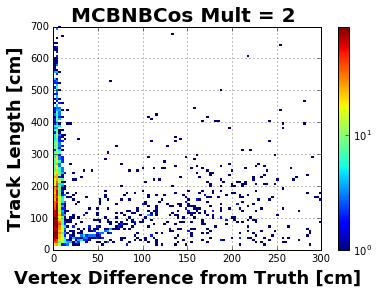

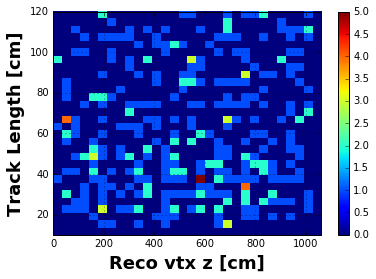

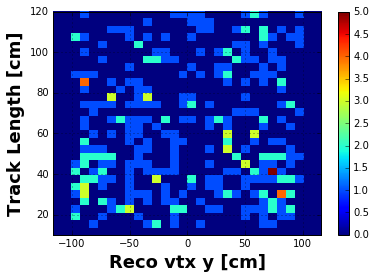

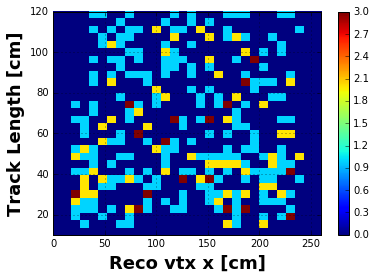

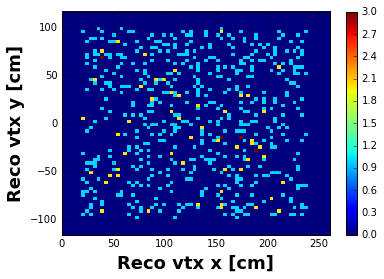

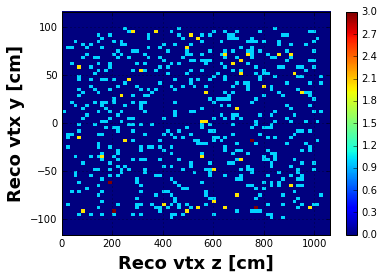

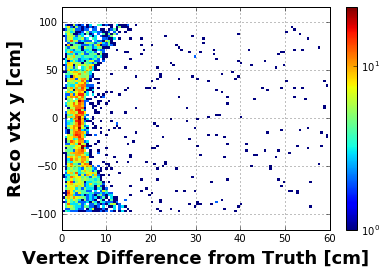

In [50]:
plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.vtx_diff.values,df_bnbcos_mult2.len.values,bins=100,\
               range=[(0,300),(0,700)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('MCBNBCos Mult = 2 ',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()

df_bnbcos_v = df.query('(mult == 2 ) and sample == 2 and vtx_diff > 15')# and vtx_diff <110')

plt.figure()
_ = plt.hist2d(df_bnbcos_v.reco_vtx_z.values,df_bnbcos_v.len.values,bins=30,\
               range=[(0,1060),(10,120)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Reco vtx z [cm]',fontsize=18,weight='bold')
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.colorbar()


plt.figure()
_ = plt.hist2d(df_bnbcos_v.reco_vtx_y.values,df_bnbcos_v.len.values,bins=30,\
               range=[(-116,116),(10,120)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Reco vtx y [cm]',fontsize=18,weight='bold')
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos_v.reco_vtx_x.values,df_bnbcos_v.len.values,bins=30,\
               range=[(0,260),(10,120)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Reco vtx x [cm]',fontsize=18,weight='bold')
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos_v.reco_vtx_x.values,df_bnbcos_v.reco_vtx_y.values,bins=70,\
               range=[(0,260),(-116,116)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Reco vtx x [cm]',fontsize=18,weight='bold')
plt.ylabel('Reco vtx y [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos_v.reco_vtx_z.values,df_bnbcos_v.reco_vtx_y.values,bins=70,\
               range=[(0,1060),(-116,116)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Reco vtx z [cm]',fontsize=18,weight='bold')
plt.ylabel('Reco vtx y [cm]',fontsize=18,weight='bold')
plt.colorbar()


plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.vtx_diff.values,df_bnbcos_mult2.reco_vtx_y.values,bins=100,\
               range=[(0,60),(-116,116)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.ylabel('Reco vtx y [cm]',fontsize=18,weight='bold')
plt.colorbar()


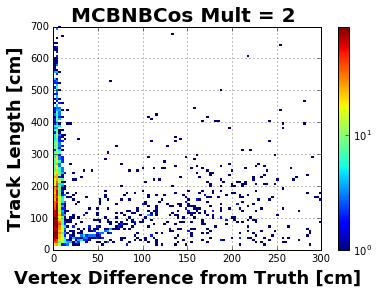

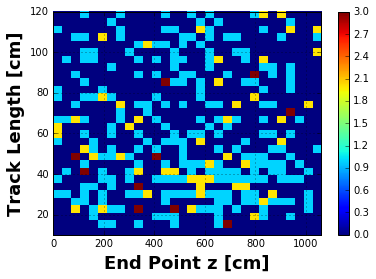

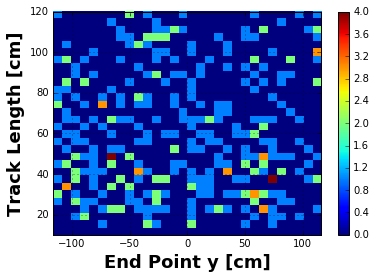

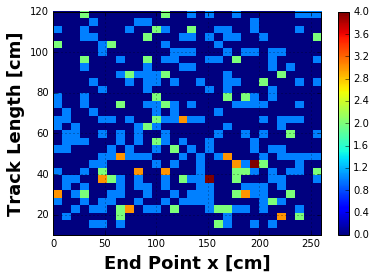

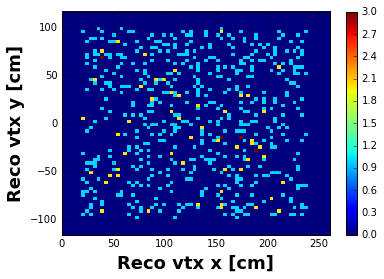

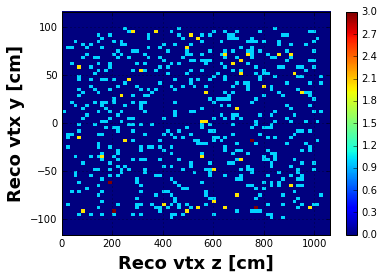

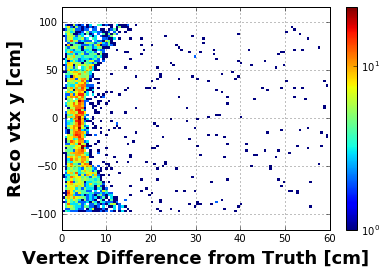

In [49]:
plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.vtx_diff.values,df_bnbcos_mult2.len.values,bins=100,\
               range=[(0,300),(0,700)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('MCBNBCos Mult = 2 ',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()

df_bnbcos_v = df.query('(mult == 2 ) and sample == 2 and vtx_diff > 15')# and vtx_diff <110')

n =30
plt.figure()
_ = plt.hist2d(df_bnbcos_v.end_z.values,df_bnbcos_v.len.values,bins=n,\
               range=[(0,1060),(10,120)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('End Point z [cm]',fontsize=18,weight='bold')
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.colorbar()


plt.figure()
_ = plt.hist2d(df_bnbcos_v.end_y.values,df_bnbcos_v.len.values,bins=n,\
               range=[(-116,116),(10,120)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('End Point y [cm]',fontsize=18,weight='bold')
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos_v.end_x.values,df_bnbcos_v.len.values,bins=n,\
               range=[(0,260),(10,120)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('End Point x [cm]',fontsize=18,weight='bold')
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos_v.reco_vtx_x.values,df_bnbcos_v.reco_vtx_y.values,bins=70,\
               range=[(0,260),(-116,116)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Reco vtx x [cm]',fontsize=18,weight='bold')
plt.ylabel('Reco vtx y [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos_v.reco_vtx_z.values,df_bnbcos_v.reco_vtx_y.values,bins=70,\
               range=[(0,1060),(-116,116)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Reco vtx z [cm]',fontsize=18,weight='bold')
plt.ylabel('Reco vtx y [cm]',fontsize=18,weight='bold')
plt.colorbar()


plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.vtx_diff.values,df_bnbcos_mult2.reco_vtx_y.values,bins=100,\
               range=[(0,60),(-116,116)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.ylabel('Reco vtx y [cm]',fontsize=18,weight='bold')
plt.colorbar()


(0, 1060)

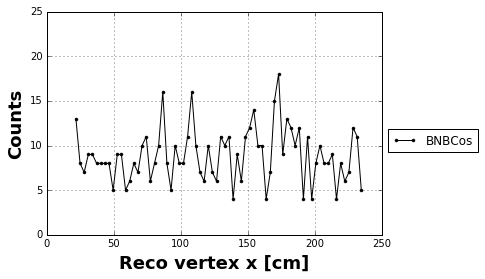

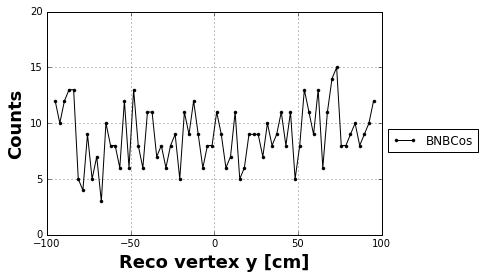

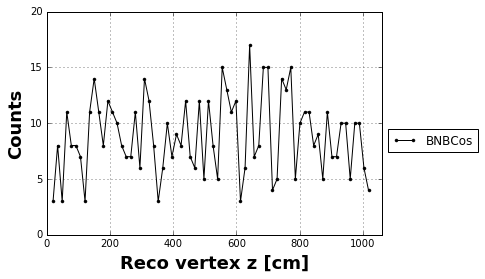

In [60]:
nbins = 70 

x_bnbcos = df_bnbcos_v.reco_vtx_x.values
x_bnb_x, y_bnb_x = np.histogram(x_bnbcos,bins=nbins)
bins_x = (y_bnb_x[:-1] + y_bnb_x[1:])/2

y_bnbcos = df_bnbcos_v.reco_vtx_y.values
x_bnb_y, y_bnb_y = np.histogram(y_bnbcos,bins=nbins)
bins_y = (y_bnb_y[:-1] + y_bnb_y[1:])/2

z_bnbcos = df_bnbcos_v.reco_vtx_z.values
x_bnb_z, y_bnb_z = np.histogram(z_bnbcos,bins=nbins)
bins_z = (y_bnb_z[:-1] + y_bnb_z[1:])/2


plt.figure()
plt.plot(bins_x,x_bnb_x,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylim(0,25)
#plt.title('Mult 1 and 2',fontsize=20,weight='bold')
plt.xlabel('Reco vertex x [cm]',fontsize=18,weight='bold')
plt.ylabel('Counts',fontsize=18,weight='bold')

plt.figure()
plt.plot(bins_y,x_bnb_y,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylim(0,20)
#plt.title('Mult 1 and 2',fontsize=20,weight='bold')
plt.xlabel('Reco vertex y [cm]',fontsize=18,weight='bold')
plt.ylabel('Counts',fontsize=18,weight='bold')


plt.figure()
plt.plot(bins_z,x_bnb_z,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylim(0,20)
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')
plt.ylabel('Counts',fontsize=18,weight='bold')
plt.xlim(0,1060)

In [93]:
intime_to_mc = 40.3628

intime_to_onbeam = 18.6927
mc_to_onbeam = 0.463117
off_to_on = 1.19153

In [132]:
df_beam_mult2 = df.query('sample == 0')#and vtx_diff > 20) ')
df_offbeam_mult2 = df.query(' sample == 1')#and vtx_diff > 20')
df_bnbcos_mult2 = df.query('sample == 2 and vtx_diff >= 25 and mult >= 2')
df_intime_mult2 = df.query(' sample == 3 and vtx_diff >= 25 and mult >=2')

df_on = df_beam_mult2
df_off = df_offbeam_mult2
df_mcbnb = df_bnbcos_mult2

In [133]:
f_beam = df_on.flash_z.values
f_offbeam = df_off.flash_z.values
f_bnbcos = df_mcbnb.flash_y.values

nbins = 50
x_off_fz, y_off_fz = np.histogram(f_offbeam,bins=nbins)
x_on_fz, y_on_fz = np.histogram(f_beam,bins=nbins)
x_bnb_fz, y_bnb_fz = np.histogram(f_bnbcos,bins=nbins)
bins_fz = (y_bnb_fz[:-1] + y_bnb_fz[1:])/2

x_offbeam = [ x_off_fz[i]*off_to_on for i in xrange(len(x_off_fz)) ]
x_bnbcos = [ x_bnb_fz[i]*mc_to_onbeam for i in xrange(len(x_bnb_fz)) ]
x_off_min_on = [x_on_fz[i] - x_off_fz[i]*off_to_on for i in xrange(len(x_on_fz))]

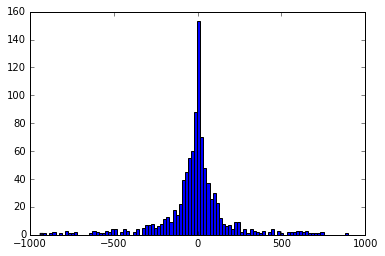

In [148]:
_,_,_ =plt.hist(df_bnbcos_mult2.flash_dist.values,bins=100)

In [142]:
df_bnbcos_mult2.head()

,event_ahack,sample,mult,mc_energy,mc_vtx_x,mc_vtx_y,mc_vtx_z,mc_len,reco_vtx_x,reco_vtx_y,...,end_z,cos_angle,cosmic,flash_z,flash_y,flash_t,flash_npe,flash_dist,calc_len,len_diff
4872,75,2,2,1.881689,176.919525,6.483564,264.057526,-9.847580e-15,172.962952,26.854868,...,340.132782,0.912240,0,304.636749,-0.381637,4.306875,1233,12.390137,21.253859,0.002047
4893,266,2,2,1.504059,119.401611,67.768646,421.501160,-9.847580e-15,145.895386,-17.546530,...,873.885864,0.990374,0,577.281006,2.429137,3.841250,3214,109.918091,261.729065,1.566833
4899,339,2,3,0.949051,217.599274,89.018410,854.663635,-9.847580e-15,148.950699,11.837665,...,783.260925,-0.944366,1,876.381226,3.295058,4.461250,848,146.861572,175.037247,19.429794
4912,471,2,4,0.732213,236.628464,-59.500751,458.408813,-9.847580e-15,113.127319,-75.129982,...,567.814087,-0.065795,1,548.982422,-9.212072,3.680000,985,32.002380,205.537170,0.101746
4936,775,2,4,1.407807,170.623886,54.155251,315.209595,-9.847580e-15,88.174545,46.887039,...,818.103149,0.885582,1,528.797852,17.971916,4.171250,5935,488.058167,383.095093,0.303314


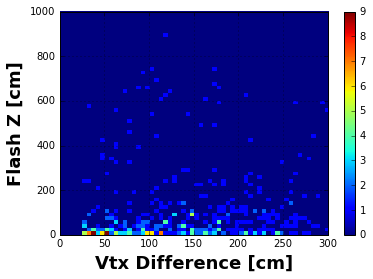

In [143]:
plt.figure()
plt.hist2d(df_bnbcos_mult2.vtx_diff.values,df_bnbcos_mult2.flash_dist.values,\
           bins=60,label='OnBeam-OffBeam',\
           range=[(0,300),(0,1000)])
#plt.plot(bins_fz,x_bnb_fz,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.colorbar()
#plt.xlim(0,200)
plt.xlabel('Vtx Difference [cm]',fontsize=18,weight='bold')
plt.ylabel('Flash Z [cm]',fontsize=18,weight='bold')

In [ ]:
### plt.figure()
plt.plot(bins_fz,x_off_fz,'r-',marker='.',lw=1,label='OnBeam-OffBeam')
plt.plot(bins_fz,x_bnb_fz,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Flash Weight Z [cm]',fontsize=18,weight='bold')
plt.ylabel('Counts',fontsize=18,weight='bold')

In [79]:
x_beam = df_on.reco_vtx_x.values
x_offbeam = df_off.reco_vtx_x.values
x_bnbcos = df_mcbnb.reco_vtx_x.values

nbins = 50
x_off_x, y_off_x = np.histogram(x_offbeam,bins=nbins)
x_on_x, y_on_x = np.histogram(x_beam,bins=nbins)
x_bnb_x, y_bnb_x = np.histogram(x_bnbcos,bins=nbins)
bins_x = (y_bnb_x[:-1] + y_bnb_x[1:])/2

x_offbeam = [ x_off_x[i]*off_to_on for i in xrange(len(x_off_x)) ]
x_bnbcos = [ x_bnb_x[i]*mc_to_onbeam for i in xrange(len(x_bnb_x)) ]
x_off_min_on = [x_on_x[i] - x_off_x[i]*off_to_on for i in xrange(len(x_on_x))]

x_ratio = [ x_off_min_on[i] / x_bnbcos[i] for i in xrange(len(x_bnbcos)) ]

In [80]:
y_beam = df_on.reco_vtx_y.values
y_offbeam = df_off.reco_vtx_y.values
y_bnbcos = df_mcbnb.reco_vtx_y.values

#nbins = 20
x_off, y_off = np.histogram(y_offbeam,bins=nbins)
x_on, y_on = np.histogram(y_beam,bins=nbins)
x_bnb, y_bnb = np.histogram(y_bnbcos,bins=nbins)
bins = (y_bnb[:-1] + y_bnb[1:])/2

y_offbeam = [ x_off[i]*off_to_on for i in xrange(len(x_off)) ]
y_bnbcos = [ x_bnb[i]*mc_to_onbeam for i in xrange(len(x_bnb)) ]
y_off_min_on = [x_on[i] - x_off[i]*off_to_on for i in xrange(len(x_on))]

y_ratio = [ y_off_min_on[i] / y_bnbcos[i] for i in xrange(len(y_bnbcos)) ]

In [81]:
z_beam = df_on.reco_vtx_z.values
z_offbeam = df_off.reco_vtx_z.values
z_bnbcos = df_mcbnb.reco_vtx_z.values

#nbins = 10 

x_off_z, y_off_z = np.histogram(z_offbeam,bins=nbins)
x_on_z, y_on_z = np.histogram(z_beam,bins=nbins)
x_bnb_z, y_bnb_z = np.histogram(z_bnbcos,bins=nbins)

bins_z = (y_bnb_z[:-1] + y_bnb_z[1:])/2

z_offbeam = [ x_off_z[i]*off_to_on for i in xrange(len(x_off_z)) ]
z_bnbcos = [ x_bnb_z[i]*mc_to_onbeam for i in xrange(len(x_bnb_z)) ]
z_off_min_on = [x_on_z[i] - x_off_z[i]*off_to_on for i in xrange(len(x_on_z))]

z_ratio = [ z_off_min_on[i] / z_bnbcos[i] for i in xrange(len(z_bnbcos)) ]

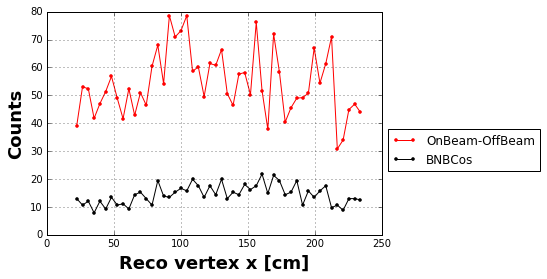

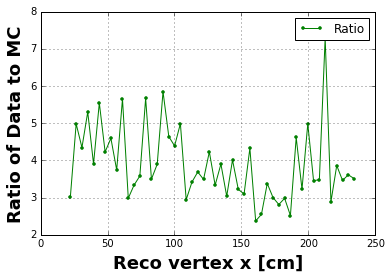

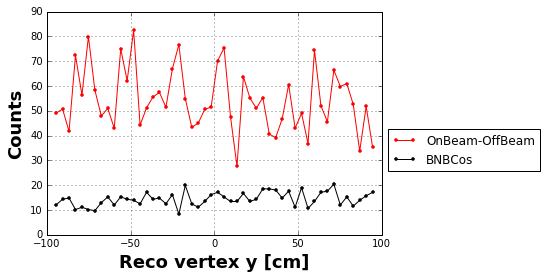

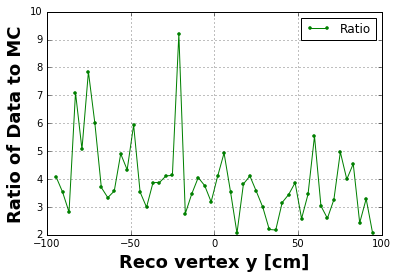

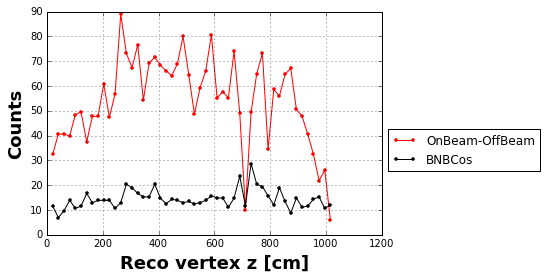

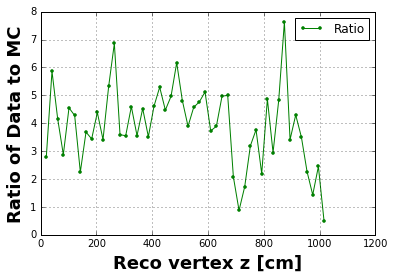

In [82]:
plt.figure()
plt.plot(bins_x,x_off_min_on,'r-',marker='.',lw=1,label='OnBeam-OffBeam')
plt.plot(bins_x,x_bnbcos,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.title('Mult 1 and 2',fontsize=20,weight='bold')
plt.xlabel('Reco vertex x [cm]',fontsize=18,weight='bold')
plt.ylabel('Counts',fontsize=18,weight='bold')

plt.figure()
plt.grid(True)
plt.plot(bins_x,x_ratio,'-',color='g',label="Ratio",marker='.')
plt.legend()
plt.ylabel('Ratio of Data to MC',fontsize=18,weight='bold')
plt.xlabel('Reco vertex x [cm]',fontsize=18,weight='bold')
#plt.ylim(0,1)

plt.figure()
plt.plot(bins,y_off_min_on,'r-',marker='.',lw=1,label='OnBeam-OffBeam')
plt.plot(bins,y_bnbcos,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.title('Mult 1 and 2',fontsize=20,weight='bold')
plt.xlabel('Reco vertex y [cm]',fontsize=18,weight='bold')
plt.ylabel('Counts',fontsize=18,weight='bold')
#ax2 = plt.twinx()
#plt.plot(bins,y_ratio,'-',color='g',label="Ratio",marker='.')

plt.figure()
plt.grid(True)
plt.plot(bins,y_ratio,'-',color='g',label="Ratio",marker='.')
plt.legend()
plt.ylabel('Ratio of Data to MC',fontsize=18,weight='bold')
plt.xlabel('Reco vertex y [cm]',fontsize=18,weight='bold')
#plt.ylim(0,1)


plt.figure()
plt.plot(bins_z,z_off_min_on,'r-',marker='.',lw=1,label='OnBeam-OffBeam')
plt.plot(bins_z,z_bnbcos,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.title('Mult 1 and 2',fontsize=20,weight='bold')
#plt.yscale('log')
plt.ylabel('Counts',fontsize=18,weight='bold')
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')

plt.figure()
plt.grid(True)
plt.plot(bins_z,z_ratio,'-',color='g',label="Ratio",marker='.')
plt.legend()
plt.ylabel('Ratio of Data to MC',fontsize=18,weight='bold')
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')
#plt.ylim(0,1)


In [83]:
x_beam = df_on.end_x.values
x_offbeam = df_off.end_x.values
x_bnbcos = df_mcbnb.end_x.values

nbins = 50
x_off_x, y_off_x = np.histogram(x_offbeam,bins=nbins)
x_on_x, y_on_x = np.histogram(x_beam,bins=nbins)
x_bnb_x, y_bnb_x = np.histogram(x_bnbcos,bins=nbins)
bins_x = (y_bnb_x[:-1] + y_bnb_x[1:])/2

x_offbeam = [ x_off_x[i]*off_to_on for i in xrange(len(x_off_x)) ]
x_bnbcos = [ x_bnb_x[i]*mc_to_onbeam for i in xrange(len(x_bnb_x)) ]
x_off_min_on = [x_on_x[i] - x_off_x[i]*off_to_on for i in xrange(len(x_on_x))]

x_ratio = [ x_off_min_on[i] / x_bnbcos[i] for i in xrange(len(x_bnbcos)) ]

In [84]:
y_beam = df_on.end_y.values
y_offbeam = df_off.end_y.values
y_bnbcos = df_mcbnb.end_y.values

#nbins = 20
x_off, y_off = np.histogram(y_offbeam,bins=nbins)
x_on, y_on = np.histogram(y_beam,bins=nbins)
x_bnb, y_bnb = np.histogram(y_bnbcos,bins=nbins)
bins = (y_bnb[:-1] + y_bnb[1:])/2

y_offbeam = [ x_off[i]*off_to_on for i in xrange(len(x_off)) ]
y_bnbcos = [ x_bnb[i]*mc_to_onbeam for i in xrange(len(x_bnb)) ]
y_off_min_on = [x_on[i] - x_off[i]*off_to_on for i in xrange(len(x_on))]

y_ratio = [ y_off_min_on[i] / y_bnbcos[i] for i in xrange(len(y_bnbcos)) ]

In [85]:
z_beam = df_on.end_z.values
z_offbeam = df_off.end_z.values
z_bnbcos = df_mcbnb.end_z.values

#nbins = 10 

x_off_z, y_off_z = np.histogram(z_offbeam,bins=nbins)
x_on_z, y_on_z = np.histogram(z_beam,bins=nbins)
x_bnb_z, y_bnb_z = np.histogram(z_bnbcos,bins=nbins)

bins_z = (y_bnb_z[:-1] + y_bnb_z[1:])/2

z_offbeam = [ x_off_z[i]*off_to_on for i in xrange(len(x_off_z)) ]
z_bnbcos = [ x_bnb_z[i]*mc_to_onbeam for i in xrange(len(x_bnb_z)) ]
z_off_min_on = [x_on_z[i] - x_off_z[i]*off_to_on for i in xrange(len(x_on_z))]

z_ratio = [ z_off_min_on[i] / z_bnbcos[i] for i in xrange(len(z_bnbcos)) ]

(0, 150)

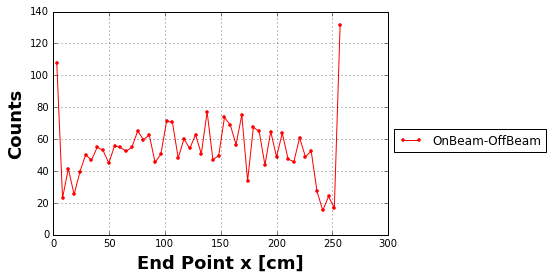

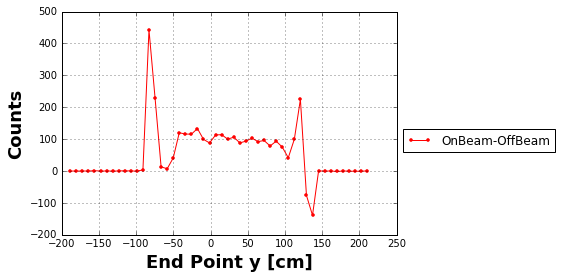

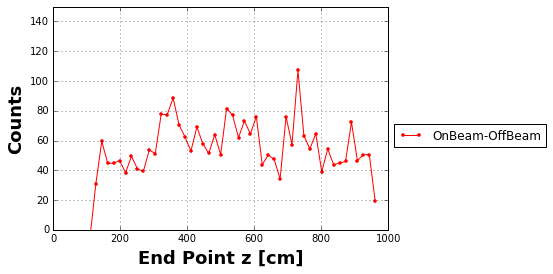

In [86]:
plt.figure()
plt.plot(bins_x,x_off_min_on,'r-',marker='.',lw=1,label='OnBeam-OffBeam')
#plt.plot(bins_x,x_bnbcos,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.title('Mult 1 and 2',fontsize=20,weight='bold')
plt.xlabel('End Point x [cm]',fontsize=18,weight='bold')
plt.ylabel('Counts',fontsize=18,weight='bold')


plt.figure()
plt.plot(bins,y_off_min_on,'r-',marker='.',lw=1,label='OnBeam-OffBeam')
#plt.plot(bins,y_bnbcos,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.title('Mult 1 and 2',fontsize=20,weight='bold')
plt.xlabel('End Point y [cm]',fontsize=18,weight='bold')
plt.ylabel('Counts',fontsize=18,weight='bold')

plt.figure()
plt.plot(bins_z,z_off_min_on,'r-',marker='.',lw=1,label='OnBeam-OffBeam')
#plt.plot(bins_z,z_bnbcos,'k-',marker='.',lw=1,label='BNBCos')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.title('Mult 1 and 2',fontsize=20,weight='bold')
#plt.yscale('log')
plt.ylabel('Counts',fontsize=18,weight='bold')
plt.xlabel('End Point z [cm]',fontsize=18,weight='bold')
plt.ylim(0,150)

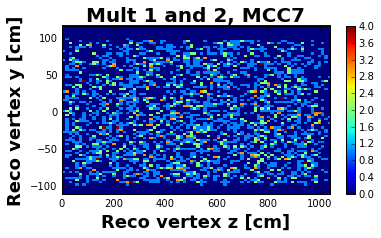

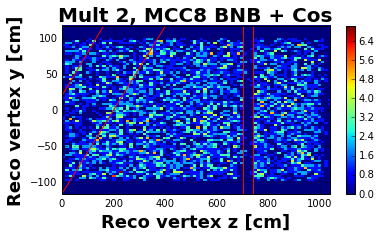

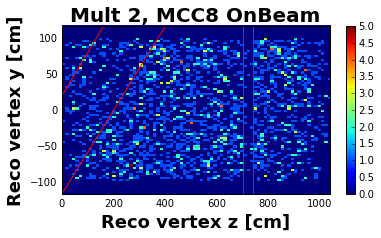

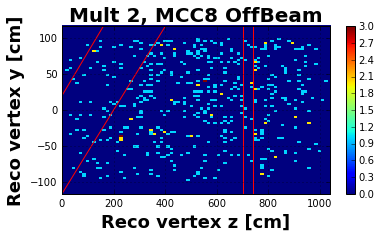

In [236]:
from matplotlib.colors import LogNorm

nbins = 80


plt.figure(figsize=(6,3))
plt.hist2d(dfmcc7_mult12.reco_vtx_z.values,dfmcc7_mult12.reco_vtx_y.values,bins=nbins,label='MCC7',\
 range=[(-1,1037),(-110,116)])#,norm=LogNorm())
#plt.plot((0,400),(-116,116),'r-',lw=1)
#plt.plot((0,160),(20,116),'r-',lw=1)
plt.colorbar()
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('Mult 1 and 2, MCC7',fontsize=20,weight='bold')
plt.ylabel('Reco vertex y [cm]',fontsize=18,weight='bold')
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')

plt.figure(figsize=(6,3))
plt.hist2d(df_mcbnb.reco_vtx_z.values,df_mcbnb.reco_vtx_y.values,bins=nbins,label='MCC8',\
          range=[(-1,1037),(-116,116)])#,norm=LogNorm())
plt.colorbar()
plt.plot((0,400),(-116,116),'r-',lw=1)
plt.plot((0,160),(20,116),'r-',lw=1)
plt.plot((700,700),(-116,116),'r-',lw=1)
plt.plot((740,740),(-116,116),'r-',lw=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('Mult 2, MCC8 BNB + Cos',fontsize=20,weight='bold')
plt.ylabel('Reco vertex y [cm]',fontsize=18,weight='bold')
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')


#nbins = 30
plt.figure(figsize=(6,3))
plt.hist2d(df_on.reco_vtx_z.values,df_on.reco_vtx_y.values,bins=nbins,label='MCC8',\
          range=[(-1,1037),(-116,116)])
plt.colorbar()
plt.plot((0,400),(-116,116),'r-',lw=1)
plt.plot((0,160),(20,116),'r-',lw=1)
plt.plot((700,700),(-116,116),'r-',lw=1)
plt.plot((740,740),(-116,116),'r-',lw=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('Mult 2, MCC8 OnBeam',fontsize=20,weight='bold')
plt.ylabel('Reco vertex y [cm]',fontsize=18,weight='bold')
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')

plt.figure(figsize=(6,3))
plt.hist2d(df_off.reco_vtx_z.values,df_off.reco_vtx_y.values,bins=nbins,label='MCC8',\
          range=[(-1,1037),(-116,116)])
plt.colorbar()
plt.plot((0,400),(-116,116),'r-',lw=1)
plt.plot((0,160),(20,116),'r-',lw=1)
plt.plot((700,700),(-116,116),'r-',lw=1)
plt.plot((740,740),(-116,116),'r-',lw=1)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('Mult 2, MCC8 OffBeam',fontsize=20,weight='bold')
plt.ylabel('Reco vertex y [cm]',fontsize=18,weight='bold')
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')


In [14]:
print df_beam_mult2.vtx_diff.values

[  2.71904719e+23   2.71904719e+23   2.71904719e+23 ...,   2.71904719e+23
   2.71904719e+23   2.71904719e+23]


In [1]:
df_onbeam = df.query('sample == 0')
df_offbeam = df.query('sample == 1')
df_bnbcos = df.query('sample == 2 ')
#df_intime = df.query('(mult == 1 or mult == 2) and sample == 3')


NameError: name 'df' is not defined

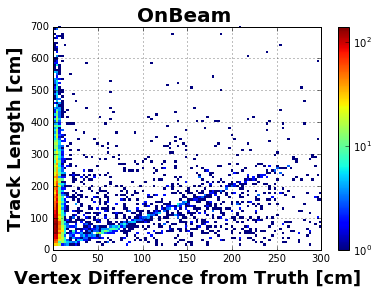

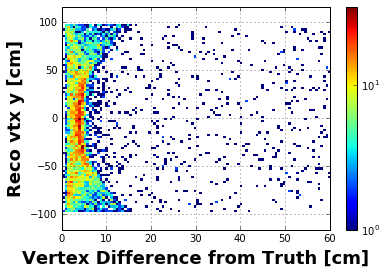

In [127]:
plt.figure()
_ = plt.hist2d(df_bnbcos.vtx_diff.values,df_bnbcos.len.values,bins=100,\
               range=[(0,300),(0,700)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('OnBeam ',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos.vtx_diff.values,df_bnbcos.reco_vtx_y.values,bins=100,\
               range=[(0,60),(-116,116)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.ylabel('Reco vtx y [cm]',fontsize=18,weight='bold')
plt.colorbar()



In [138]:
df_onbeam = df.query('sample == 0 ')
df_offbeam = df.query('sample == 1')
df_bnbcos = df.query('sample == 2 and vtx_diff < 15')
#df_intime = df.query('(mult == 1 or mult == 2) and sample == 3')

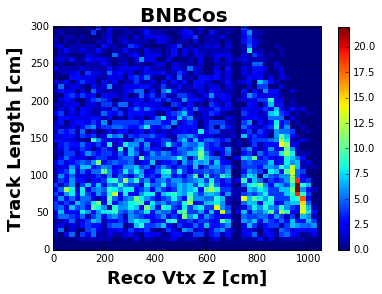

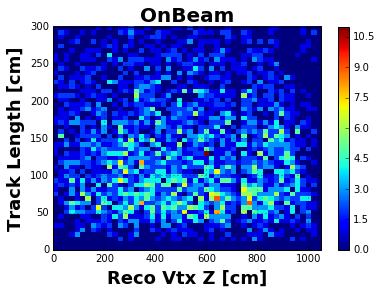

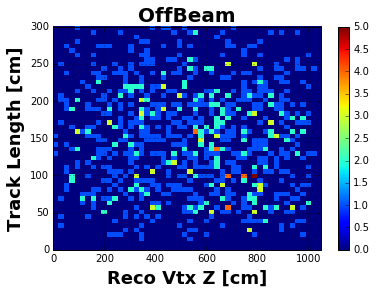

In [139]:
plt.figure()
_ = plt.hist2d(df_bnbcos.reco_vtx_z.values,df_bnbcos.len.values,bins=50,\
               range=[(0,1050),(0,300)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('BNBCos ',fontsize=20,weight='bold')
plt.xlabel('Reco Vtx Z [cm]',fontsize=18,weight='bold')
plt.colorbar()
#plt.axvline(900,color='r',lw=2)

plt.figure()
_ = plt.hist2d(df_onbeam.reco_vtx_z.values,df_onbeam.len.values,bins=50,\
               range=[(0,1050),(0,300)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('OnBeam',fontsize=20,weight='bold')
plt.xlabel('Reco Vtx Z [cm]',fontsize=18,weight='bold')
plt.colorbar()
#plt.axvline(900,color='r',lw=2)


plt.figure()
_ = plt.hist2d(df_offbeam.reco_vtx_z.values,df_offbeam.len.values,bins=50,\
               range=[(0,1050),(0,300)])#,norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('OffBeam',fontsize=20,weight='bold')
plt.xlabel('Reco Vtx Z [cm]',fontsize=18,weight='bold')
plt.colorbar()

#df_bnbcos.head()

In [63]:
beam = df_beam_mult1.len.values
offbeam = df_offbeam_mult1.len.values
bnbcos = df_bnbcos_mult1.len.values

nbins = 1000
x_off, y_off = np.histogram(offbeam,bins=nbins)
x_on, y_on = np.histogram(beam,bins=nbins)
x_bnb, y_bnb = np.histogram(bnbcos,bins=nbins)
bins_l = (y_bnb[:-1] + y_bnb[1:])/2

l_offbeam = [ x_off[i]*off_to_on for i in xrange(len(x_off)) ]
l_bnbcos = [ x_bnb[i]*mc_to_onbeam for i in xrange(len(x_bnb)) ]
l_off_min_on = [x_on[i] - x_off[i]*off_to_on for i in xrange(len(x_on))]

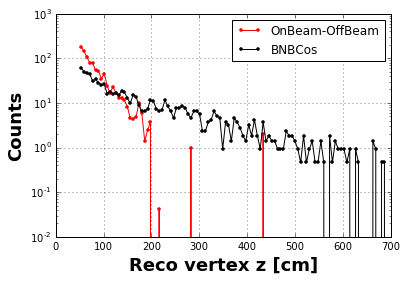

In [64]:
plt.figure()
plt.plot(bins_l,l_off_min_on,'r-',marker='.',lw=1,label='OnBeam-OffBeam')
plt.plot(bins_l,l_bnbcos,'k-',marker='.',lw=1,label='BNBCos')
plt.legend()#loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Counts',fontsize=18,weight='bold')
plt.yscale('log')
plt.xlim(0,700)
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')


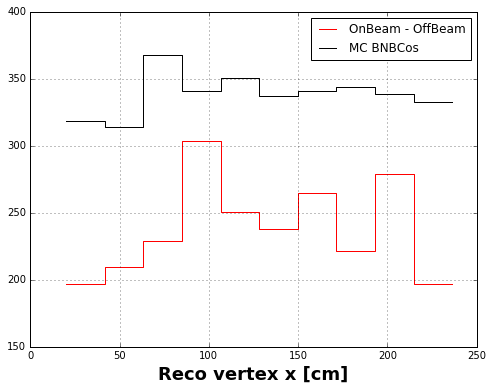

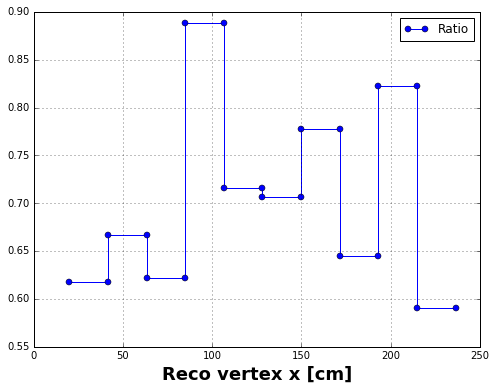

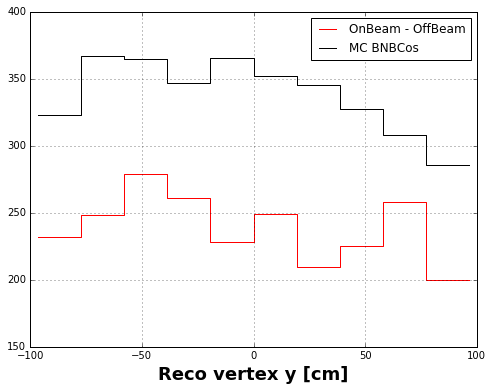

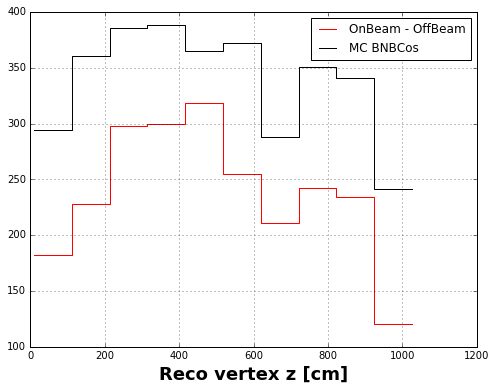

In [190]:
left, right = y_bnb_x[:-1], y_bnb_x[1:]
X = np.array([left,right]).T.flatten()
Y0 = np.array([x_off_min_on,x_off_min_on]).T.flatten()
Y1 = np.array([x_bnbcos,x_bnbcos]).T.flatten()
ratio = [Y0[i] / Y1[i] for i in xrange(len(Y1))]

fig = plt.figure(figsize=(8,6))
plt.plot(X,Y0,'r',label='OnBeam - OffBeam')
plt.plot(X,Y1,'k-',label='MC BNBCos')
plt.grid(True)#,color='k',lw=3)
plt.xlabel('Reco vertex x [cm]',fontsize=18,weight='bold')
plt.legend()

fig = plt.figure(figsize=(8,6))
plt.plot(X,ratio,'b',marker='o',label='Ratio')
plt.grid(True)#,color='k',lw=3)
plt.xlabel('Reco vertex x [cm]',fontsize=18,weight='bold')
plt.legend()

left, right = y_bnb[:-1], y_bnb[1:]
X = np.array([left,right]).T.flatten()
Y0 = np.array([y_off_min_on,y_off_min_on]).T.flatten()
Y1 = np.array([y_bnbcos,y_bnbcos]).T.flatten()

fig = plt.figure(figsize=(8,6))
plt.plot(X,Y0,'r-',label='OnBeam - OffBeam')
plt.plot(X,Y1,'k-',label='MC BNBCos')
plt.grid(True)#,color='k',lw=3)
plt.xlabel('Reco vertex y [cm]',fontsize=18,weight='bold')
plt.legend()

left, right = y_bnb_z[:-1], y_bnb_z[1:]
X = np.array([left,right]).T.flatten()
Y0 = np.array([z_off_min_on,z_off_min_on]).T.flatten()
Y1 = np.array([z_bnbcos,z_bnbcos]).T.flatten()

fig = plt.figure(figsize=(8,6))
plt.plot(X,Y0,'r-',label='OnBeam - OffBeam')
plt.plot(X,Y1,'k-',label='MC BNBCos')
plt.grid(True)#,color='k',lw=3)
plt.xlabel('Reco vertex z [cm]',fontsize=18,weight='bold')
plt.legend()

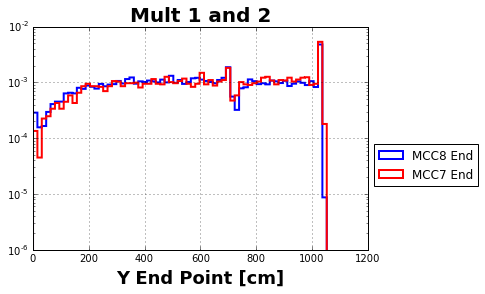

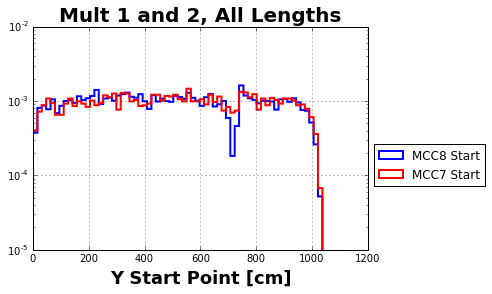

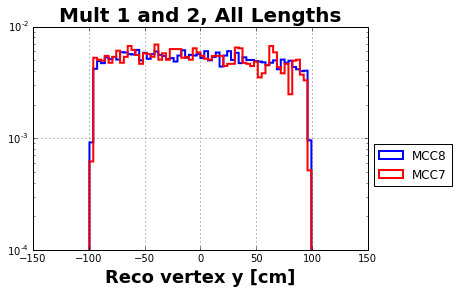

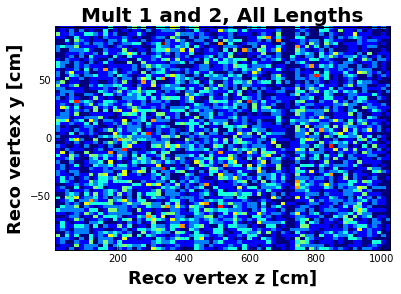

In [38]:
xmin = -120
xmax = 120
n = True

plt.figure()
_ = plt.hist(df_mult12.end_z.values,bins=70,normed=n,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8 End',range=(0,1100))
_ = plt.hist(dfmcc7_mult12.end_z.values,bins=70,normed=n,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7 End',range=(0,1100))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('Mult 1 and 2',fontsize=20,weight='bold')
plt.yscale('log')
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_mult12.start_z.values,bins=70,normed=n,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8 Start',range=(0,1100))
_ = plt.hist(dfmcc7_mult12.start_z.values,bins=70,normed=n,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7 Start',range=(0,1100))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('Mult 1 and 2, All Lengths',fontsize=20,weight='bold')
plt.yscale('log')
plt.xlabel('Y Start Point [cm]',fontsize=18,weight='bold')



plt.figure()
_ = plt.hist(df_mult12.reco_vtx_y.values,bins=70,normed=n,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult12.reco_vtx_y.values,bins=70,normed=n,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('Mult 1 and 2, All Lengths',fontsize=20,weight='bold')
plt.yscale('log')
plt.xlabel('Reco vertex y [cm]',fontsize=18,weight='bold')



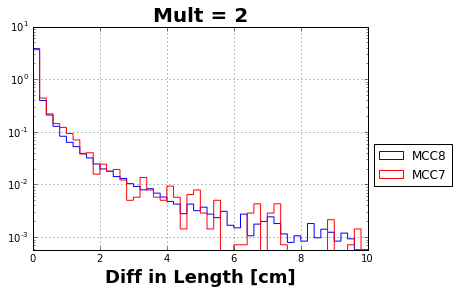

In [265]:
xmin = 0
xmax = 10

plt.figure()
_ = plt.hist(df_mult2.len_diff.values,bins=50,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=1,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2.len_diff.values,bins=50,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=1,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,10)
plt.xlabel('Diff in Length [cm]',fontsize=18,weight='bold')


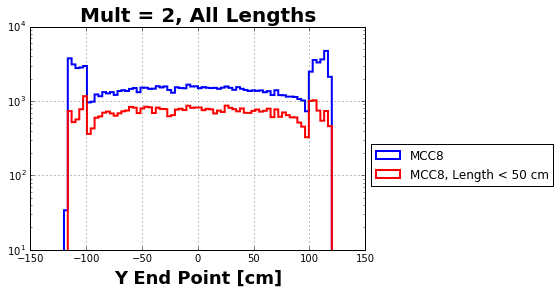

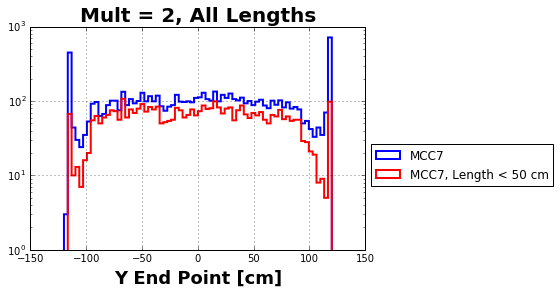

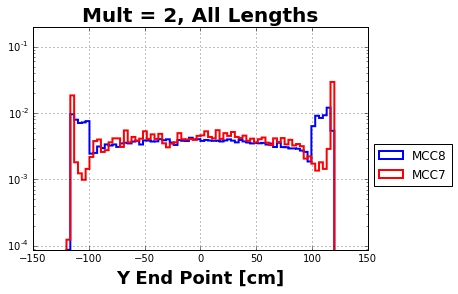

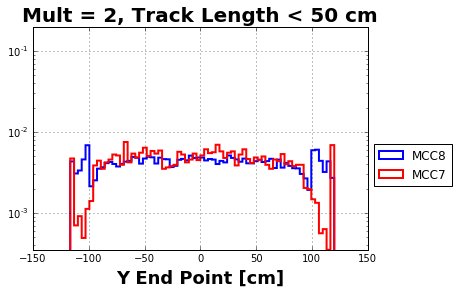

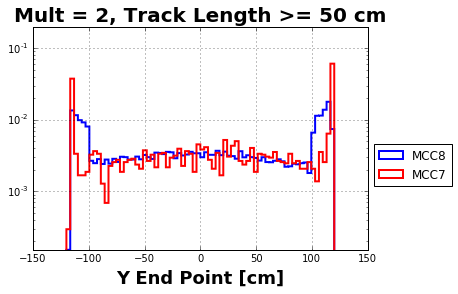

In [272]:
xmin = -120
xmax = 120

plt.figure()
_ = plt.hist(df_mult2.end_y.values,bins=70,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(df_mult2lowlen.end_y.values,bins=70,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC8, Length < 50 cm',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, All Lengths',fontsize=20,weight='bold')
plt.yscale('log')
#plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(dfmcc7_mult2.end_y.values,bins=70,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC7',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2lowlen.end_y.values,bins=70,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7, Length < 50 cm',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, All Lengths',fontsize=20,weight='bold')
plt.yscale('log')
#plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')


plt.figure()
_ = plt.hist(df_mult2.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, All Lengths',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_mult2lowlen.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2lowlen.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, Track Length < 50 cm',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')


plt.figure()
_ = plt.hist(df_mult2highlen.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(xmin,xmax))
_ = plt.hist(dfmcc7_mult2highlen.end_y.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(xmin,xmax))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2, Track Length >= 50 cm',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Y End Point [cm]',fontsize=18,weight='bold')


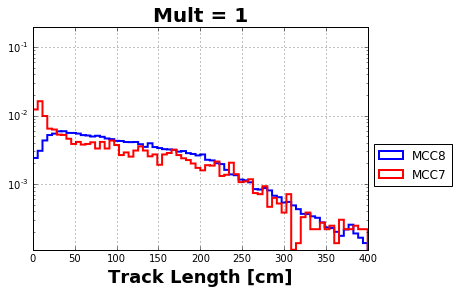

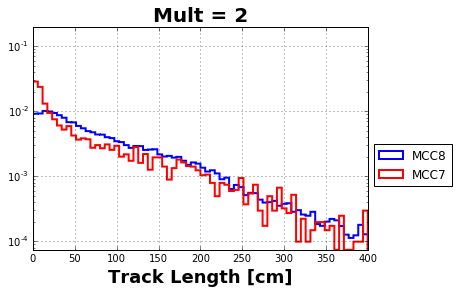

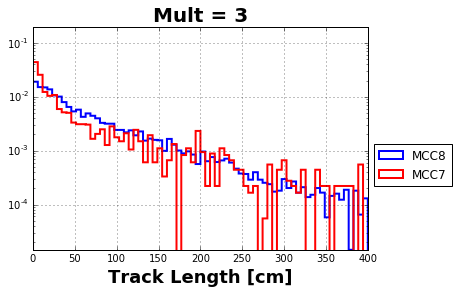

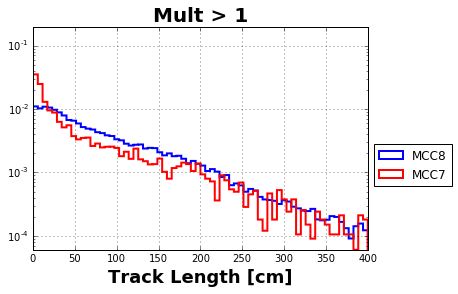

In [188]:
plt.figure()
_ = plt.hist(df_mult1.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(0,400))
_ = plt.hist(dfmcc7_mult1.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 1',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_mult2.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(0,400))
_ = plt.hist(dfmcc7_mult2.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_mult3.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(0,400))
_ = plt.hist(dfmcc7_mult3.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 3',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')

plt.figure()
_ = plt.hist(df_multgt1.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8',range=(0,400))
_ = plt.hist(dfmcc7_multgt1.len.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult > 1',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')

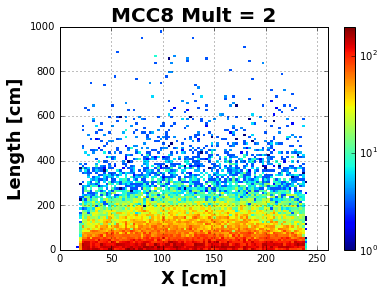

In [180]:
plt.figure()
_ = plt.hist2d(df_mult2.start_x,df_mult2.len,bins=100,range=[(0,260),(0,1000)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC8 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('X [cm]',fontsize=18,weight='bold')
plt.ylabel('Length [cm]',fontsize=18,weight='bold')
#plt.axhline(-100,color='k',lw=3)
plt.colorbar()

plt.figure()

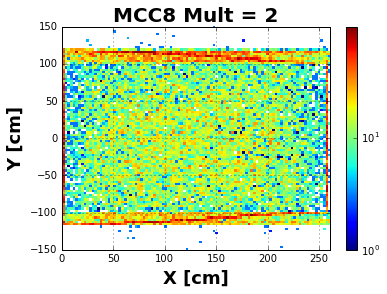

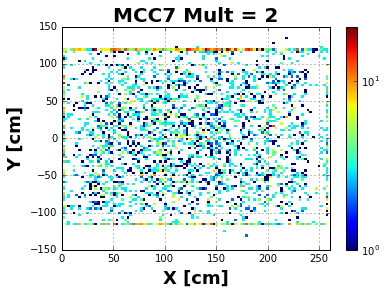

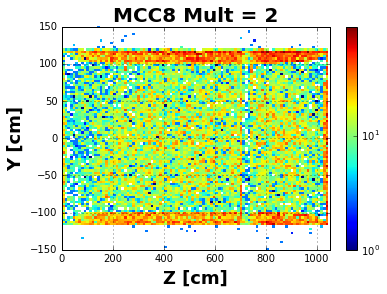

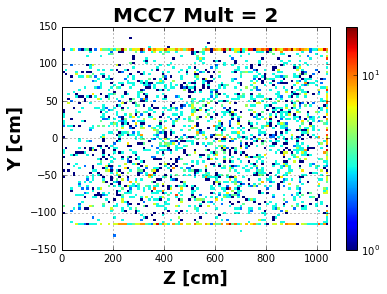

In [176]:
plt.figure()
_ = plt.hist2d(df_mult2.end_x,df_mult2.end_y,bins=100,range=[(0,260),(-150,150)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC8 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('X [cm]',fontsize=18,weight='bold')
plt.ylabel('Y [cm]',fontsize=18,weight='bold')
#plt.axhline(-100,color='k',lw=3)
plt.colorbar()

plt.figure()
_ = plt.hist2d(dfmcc7_mult2.end_x,dfmcc7_mult2.end_y,bins=100,range=[(0,260),(-150,150)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC7 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('X [cm]',fontsize=18,weight='bold')
plt.ylabel('Y [cm]',fontsize=18,weight='bold')
#plt.axhline(-100,color='k',lw=3)
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_mult2.end_z,df_mult2.end_y,bins=100,range=[(0,1050),(-150,150)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC8 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('Z [cm]',fontsize=18,weight='bold')
plt.ylabel('Y [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(dfmcc7_mult2.end_z,dfmcc7_mult2.end_y,bins=100,range=[(0,1050),(-150,150)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.title('MCC7 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('Z [cm]',fontsize=18,weight='bold')
plt.ylabel('Y [cm]',fontsize=18,weight='bold')
plt.colorbar()
#plt.axhline(-100,color='k',lw=3)

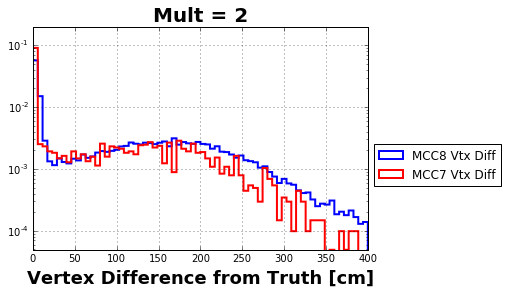

In [190]:
from matplotlib.colors import LogNorm

plt.figure()
v8,b8,_ = plt.hist(df_mult2.vtxdiff.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='b',\
             lw=2,label='MCC8 Vtx Diff',range=(0,400))
v7,b7,_ = plt.hist(dfmcc7_mult2.vtxdiff.values,bins=70,normed=True,histtype='step',fill=None,edgecolor='r',\
             lw=2,label='MCC7 Vtx Diff',range=(0,400))

plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('Mult = 2',fontsize=20,weight='bold')
plt.yscale('log')
plt.ylim(0,0.2)
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')

In [197]:
print np.cumsum(v8)[2]/np.cumsum(v8)[-1]
print np.cumsum(v7)[2]/np.cumsum(v7)[-1]

0.42711421714
0.545121263395


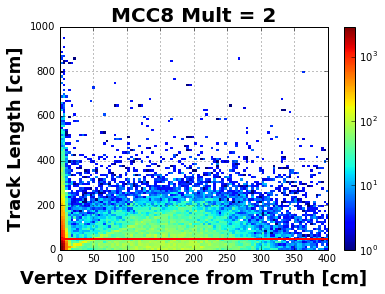

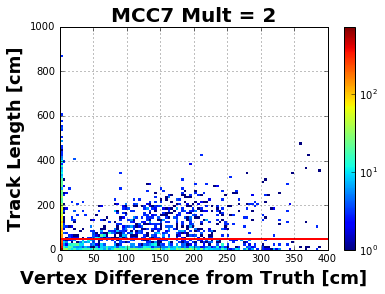

In [161]:
plt.figure()
_ = plt.hist2d(df_mult2.vtxdiff,df_mult2.len,bins=100,range=[(0,400),(0,1000)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('MCC8 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(50,color='r',lw=2)

plt.figure()
_ = plt.hist2d(dfmcc7_mult2.vtxdiff,dfmcc7_mult2.len,bins=100,range=[(0,400),(0,1000)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('MCC7 Mult = 2',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(50,color='r',lw=2)


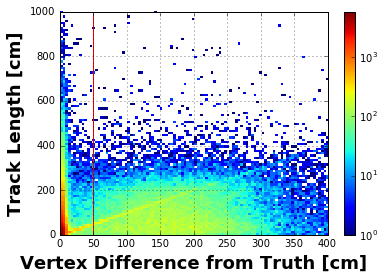

In [126]:
from matplotlib.colors import LogNorm

plt.figure()
_ = plt.hist2d(df.vtxdiff,df.len,bins=100,range=[(0,400),(0,1000)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axvline(50,color='r')

nbins=100

#H, xedges, yedges = np.histogram2d(df.len,df.vtxdiff,bins=nbins,range=[(0,1500),(0,100)])
#Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

#plt.pcolormesh(yedges,xedges,Hmasked)


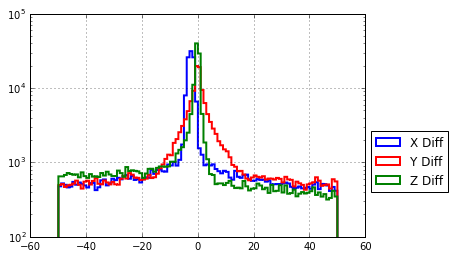

In [37]:
r = 50
plt.figure()
_ =plt.hist(df.mc_vtx_x - df.reco_vtx_x,bins=100,histtype='step',fill=None,edgecolor='b',lw=2,label='X Diff',range=(-r,r))
_ =plt.hist(df.mc_vtx_y - df.reco_vtx_y,bins=100,histtype='step',fill=None,edgecolor='r',lw=2,label='Y Diff',range=(-r,r))
_ =plt.hist(df.mc_vtx_z - df.reco_vtx_z,bins=100,histtype='step',fill=None,edgecolor='g',lw=2,label='Z Diff',range=(-r,r))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
#plt.axvline(0,color='r',lw=2)
plt.yscale('log')